In [119]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('Activities.csv', parse_dates=['Date', 'Time'], index_col='Date')

In [121]:
df_w = pd.read_csv('weight.csv', 
                   sep=';', 
                   parse_dates = [0], 
                   names=['Date', 'Weight'], 
                   index_col='Date', 
                   decimal=',')

In [122]:
df_w = df_w.dropna()

In [136]:
# df_w['week'] = df_w.index.strftime('%U').astype('int') 
df_w['week'] = df_w.index.isocalendar().week
m_weight = df_w.groupby('week').describe()['Weight']['50%']

In [124]:
m_weight

week
1    81.25
2    80.60
3    80.40
4    80.30
5    81.15
6    80.50
7    81.30
Name: 50%, dtype: float64

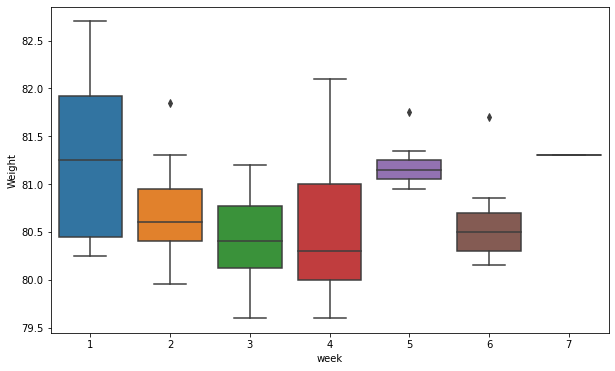

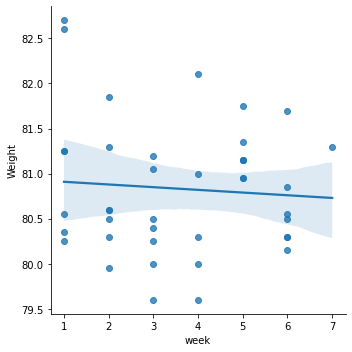

In [125]:
fig, ax = plt.subplots(figsize = (10,6))
graph1 = sns.boxplot(x="week", y="Weight", data=df_w, ax=ax)
sns.lmplot(x="week", y="Weight", data=df_w)

In [126]:
def find_speed(a):
    # Return km in h spead 
    return( (a.hour+a.minute/60+a.second/(60*60) ))

df['Time_h'] = df['Time'].map(find_speed)
df['Speed'] = df['Distance']/df['Time_h']
df['Effective'] = 1/ ( df['Speed']/ ( df['Avg HR']*60 ) )/1000# beats to meter
df['week'] = df.index.strftime('%U').astype('int')

In [127]:
def convert_pace(pace, pulse):
    #Convert to speed in km per hour
    speed = 1/pace*60
    effectiveness = 1/(speed / (pulse * 60) )/1000
    return(effectiveness)

In [128]:
convert_pace(4.3, 165)

0.7095

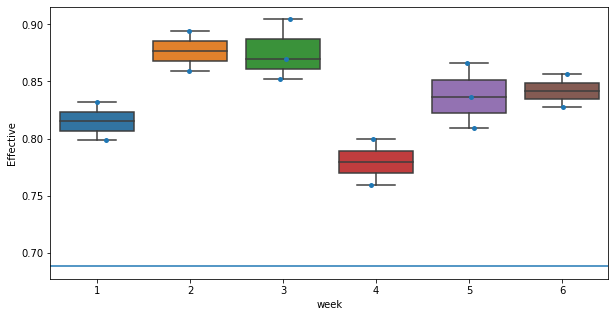

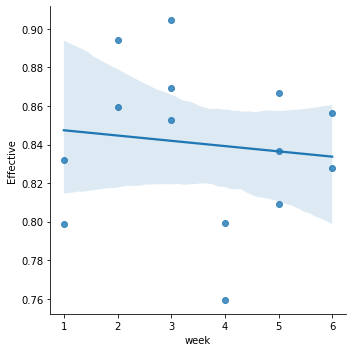

In [129]:
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(x="week", y="Effective", data=df.loc['2023'].sort_values('week'), ax=ax, )
sns.stripplot(x="week",
              y="Effective",
              data=df.loc['2023'].sort_values('week'),
              ax=ax,)
sns.lmplot(x="week", y="Effective", data=df.loc['2023'])
ax.axhline(convert_pace(4.3, 160))